<i> Logistic Regression Assignment | DS-C33</i>

---

# Lead Scoring Case Study
<i>Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads</i>

---
Submitted By: [Bhanu Pratap Singh](https://www.linkedin.com/in/bpst/) | [Shivika Khandelwal](https://www.linkedin.com/in/shivika-khandelwal-52486374/)

In [1]:
# Importing required packages
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Test-Train Split
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# For Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model evaluation
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing and Inspecting Dataset

In [2]:
# Load dataset
leads = pd.read_csv('Leads.csv')
leads.shape

(9240, 37)

In [3]:
# View top 2 rows
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [4]:
# Checking column types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see there are total 9240 data points with 37 features where 30 of object type, 4 of float type and 3 of int type. There are few feature with missing values as well. Also features like `Prospect ID, Lead Number, City and Country` can be dropped as they are not so significant for our model.

In [5]:
# Check statistical summay
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Preparation

In [6]:
# Check the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [7]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum().sort_values(ascending=False)/leads.shape[0]),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Clearly features have mssing values ranging from as high as `51.59%` to as low as `1.11%`, clearly, these columns are not useful, so drop all the columns with more than `35%` missing values. Also dropping features `City, Country, Prospect ID and Lead Number` as well.

### Handle Missing Values

In [8]:
# Dropping redundent columns and columns with more than 35% missing values
leads.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score',
           'Asymmetrique Profile Index','Tags','City','Country','Prospect ID','Lead Number'], axis=1, inplace=True)

In [9]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum().sort_values(ascending=False)/leads.shape[0]), 2).head(10)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
dtype: float64

In [10]:
# Checking value counts for all categorial variables
for column in leads.select_dtypes('object').columns:
    pattern = '\n---------------------------------------\n'
    print(leads[column].value_counts(), end=pattern)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64
---------------------------------------
No     8506
Yes     734
Name: Do Not Email, dtype: int64
---------------------------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int

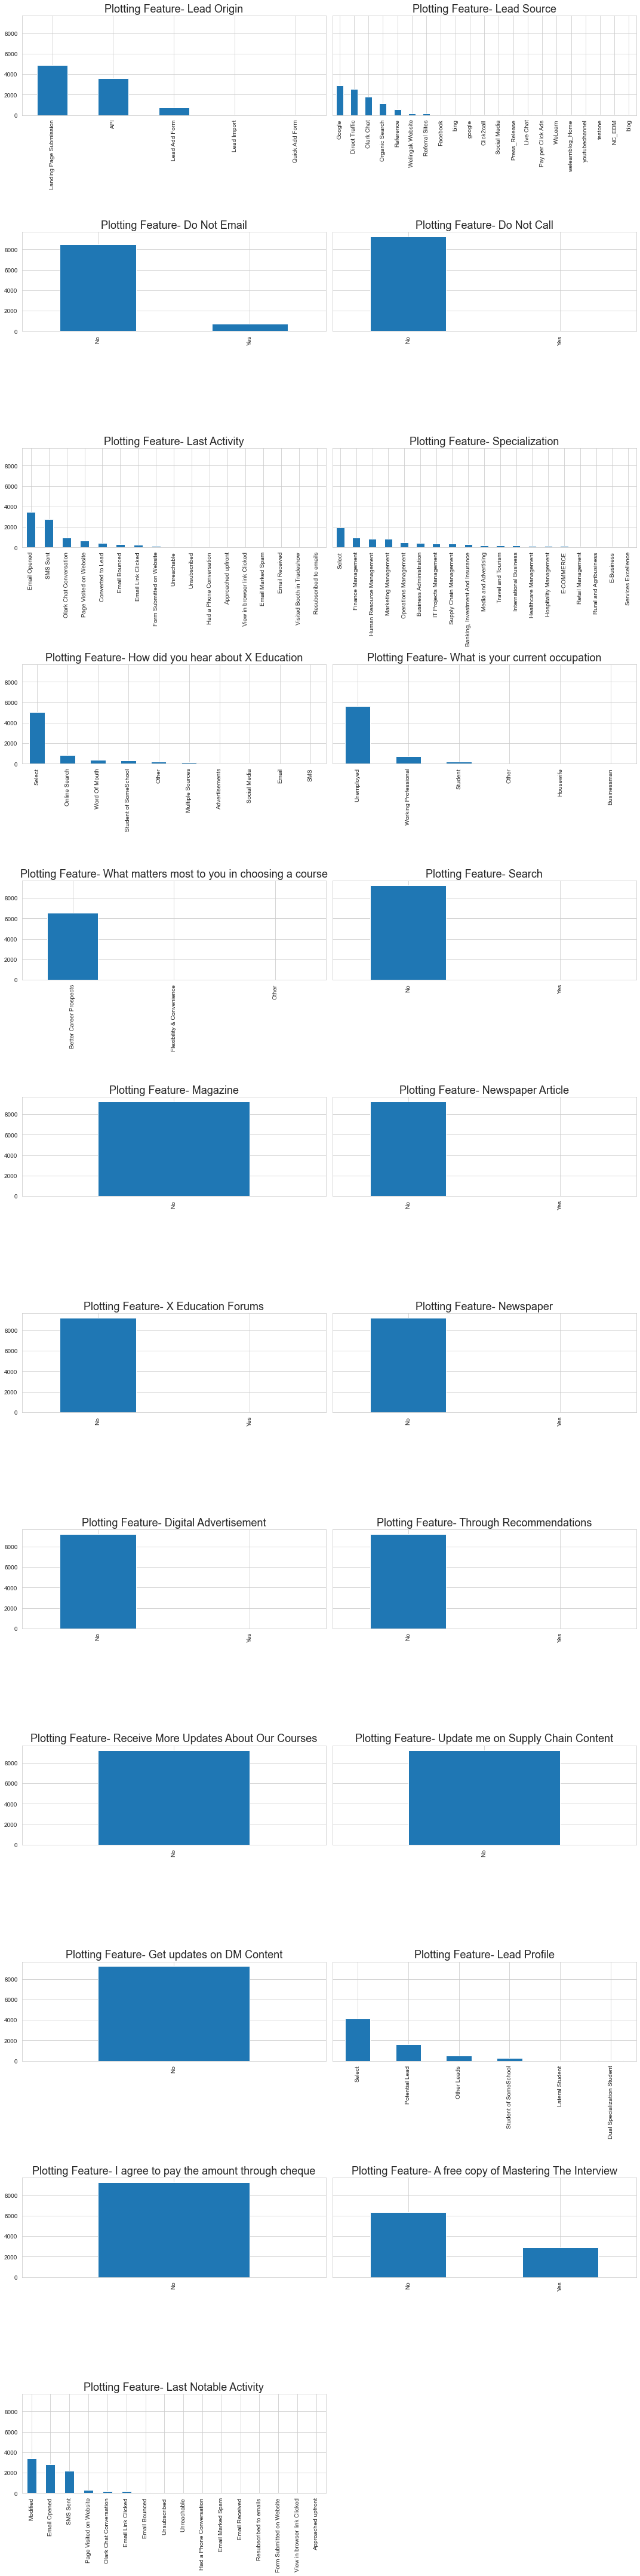

In [11]:
# Plotting categorical features
sns.set_style('whitegrid')
ncols = 2
col_subplots = leads.select_dtypes('object').columns
nrows = (len(col_subplots) + ncols - 1) // ncols
fix, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(7.5 * ncols, 5 * nrows), sharey=True)
axes_it = axes.flat

# Loop through categorical features
for column, ax in zip(col_subplots, axes_it):
    counts = leads[column].value_counts()
    ax.set_title('Plotting Feature- '+ column, fontsize=18)
    counts.plot.bar(ax=ax, stacked=True, rot=90)

# If number of columns not multiple of ncols, hide remaining axes
for ax in axes_it:
    ax.axis('off')
    
# Plot
fix.tight_layout()
plt.show()

Clearly, there are many features like `Magazine, Search, Newspaper, etc.` in which only one value is majorly present for all the data points, lets drop these features as they have no or low variance.

In [12]:
# Dropping columns
leads.drop(['Do Not Call','Magazine','Search','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
            'I agree to pay the amount through cheque','X Education Forums'], axis=1, inplace=True)

In [13]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum().sort_values(ascending=False)/leads.shape[0]), 2).head(10)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
dtype: float64

In [14]:
# Helper function to plot countplot
def plot_countplot(column, rot=90):
    sns.countplot(x=column, data=leads)
    plt.xticks(rotation=rot);

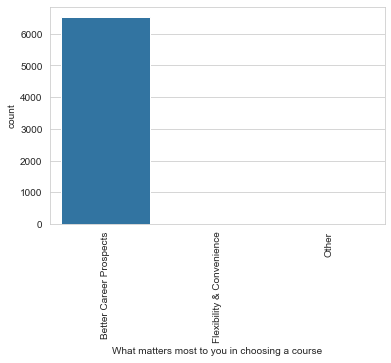

In [15]:
# Check What matters most to you in choosing a course feature
plot_countplot('What matters most to you in choosing a course')

As feature `What matters most to you in choosing a course` has no variance, we will drop this as well.

In [16]:
# Dropping feature
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

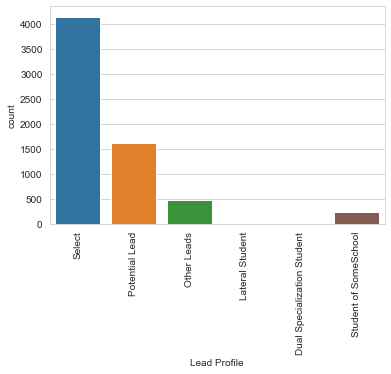

In [17]:
# Check Lead Profile feature
plot_countplot('Lead Profile')

In [18]:
# Calculate Select column percentage
round(len(leads[leads['Lead Profile']=='Select'])/len(leads.index),2)

0.45

Now interestingly, feature `Lead Profile` has 29.32% missing data already. Now `Select` values is as good as missing value, so commulative missing value percent for this feature comes out to be `74.32%`, hence dropping this feature.

In [19]:
# Dropping feature
leads.drop('Lead Profile', axis=1, inplace=True)

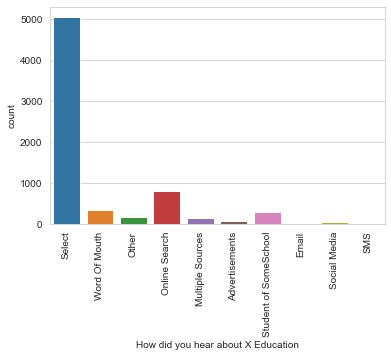

In [20]:
# Check How did you hear about X Education feature
plot_countplot('How did you hear about X Education')

In [21]:
# Calculate Select column percentage
round(len(leads[leads['How did you hear about X Education']=='Select'])/len(leads.index),2)

0.55

Similarly, commulative missing value percent for this feature comes out to be `78.89%`, hence dropping this feature.

In [22]:
# Dropping feature
leads.drop('How did you hear about X Education', axis=1, inplace=True) 

In [23]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum().sort_values(ascending=False)/leads.shape[0]),2)

What is your current occupation           29.11
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [24]:
# Drop rows with null values
leads = leads[~leads['What is your current occupation'].isnull()]
leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Lead Source'].isnull()]
leads = leads[~leads['Specialization'].isnull()]

In [25]:
# Check the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [26]:
# Checking shape of dataset
leads.shape

(6373, 12)

In [27]:
# Data retension rate
print('{0} %'.format(round(leads.shape[0]/9240,2)*100))

69.0 %


### Handle Spceial `Select` Case

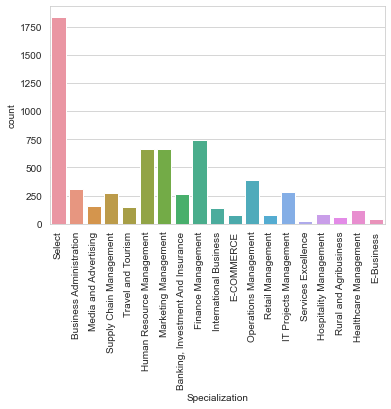

In [28]:
# Checking Specialization feature
plot_countplot('Specialization')

In [29]:
# Calculate Select column percentage
round(len(leads[leads['Specialization']=='Select'])/len(leads.index),2)

0.29

In [30]:
# Data retention rate
dummy_df = leads.copy()
dummy_df['Specialization'] = dummy_df['Specialization'].replace('Select',np.nan)
dummy_df = dummy_df[~dummy_df['Specialization'].isnull()]
print('{0} %'.format(round(dummy_df.shape[0]/9240,2)*100))

49.0 %


Here `Specialization` feature is significant, so dropping the data points with `Select` value will impact our data retension rate. So we will handle this in One-Hot Encdoding step.

### One-Hot Encoding

In [31]:
# View categorical variables
leads.loc[:, leads.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [32]:
# Create dummy variables using the 'get_dummies' function
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [33]:
# Creating dummy variable separately for the variable 'Specialization'
dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis=1)

In [34]:
# Drop the variables for which the dummy variables have been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [35]:
# Checking shape
leads.shape

(6373, 75)

## Outlier Treatment

In [36]:
# View statistical details
leads[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,6373.000000,6373.000000,6373.000000
mean,3.624196,2.480464,535.224541
std,5.048555,2.167364,565.374753
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,34.000000
50%,3.000000,2.000000,287.000000
75%,5.000000,3.500000,1022.000000
90%,8.000000,5.000000,1428.800000
95%,10.000000,6.000000,1592.400000
99%,18.000000,9.000000,1849.280000


There are some outliers present for features `TotalVisits and Page Views Per Visit` as `99%` and `max` values have huge difference. Let handle outliers

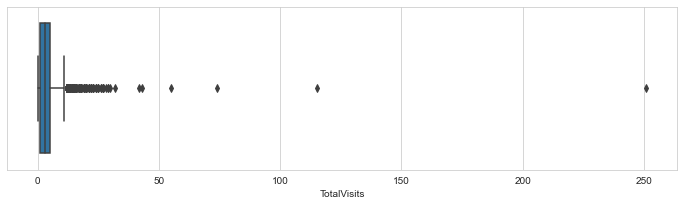

In [37]:
# Plot boxplot
plt.figure(figsize=(12,3))
sns.boxplot(leads['TotalVisits']);

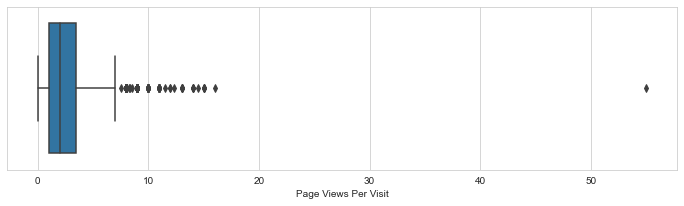

In [38]:
# Plot boxplot
plt.figure(figsize=(12,3))
sns.boxplot(leads['Page Views Per Visit']);

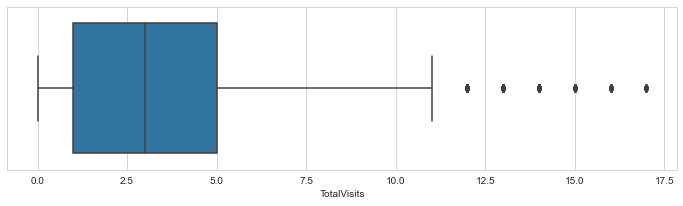

In [39]:
# Exclude value outside of 99th percentile 
leads = leads[leads['TotalVisits'] < np.nanpercentile(leads['TotalVisits'], 99)]
plt.figure(figsize=(12,3))
sns.boxplot(leads['TotalVisits']);

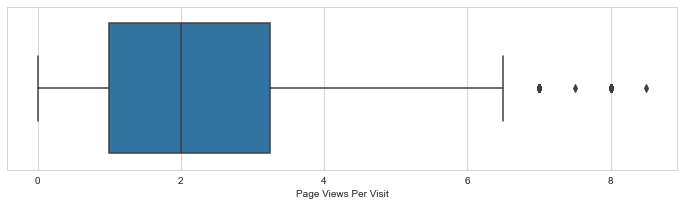

In [40]:
# Exclude value outside of 99th percentile 
leads = leads[leads['Page Views Per Visit'] < np.nanpercentile(leads['Page Views Per Visit'], 99)]
plt.figure(figsize=(12,3))
sns.boxplot(leads['Page Views Per Visit']);

In [41]:
# Data retension rate
print('{0} %'.format(round(leads.shape[0]/9240,2)*100))

67.0 %


So there is not much significant reduction in the data i.e. 69% to 67%.

In [42]:
# Check shape
leads.shape

(6226, 75)

## Test-Train Split

In [43]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

# Putting response variable to y
y = leads['Converted']

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
# Checking shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4358, 74)
(1868, 74)
(4358,)
(1868,)


## Feature Scaling

In [46]:
# View top 5 rows
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Since our traget variable is of binary type hence using MinMaxScalar

In [47]:
# Scale data
scaler = MinMaxScaler()
features = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[features] = scaler.fit_transform(X_train[features])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4305,0.352941,0.164173,0.705882,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2675,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7045,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2027,0.294118,0.453345,0.588235,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1410,0.294118,0.129401,0.588235,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Looking at the correlations

In [48]:
# View top 60 correlations
corr_df = X_train.corr()
corr_df.unstack().sort_values(ascending=False).drop_duplicates().head(60)

TotalVisits                                           TotalVisits                                             1.000000
Lead Origin_Lead Import                               Lead Source_Facebook                                    0.973216
Last Activity_Unsubscribed                            Last Notable Activity_Unsubscribed                      0.898199
Last Notable Activity_SMS Sent                        Last Activity_SMS Sent                                  0.891988
Lead Source_Reference                                 Lead Origin_Lead Add Form                               0.875327
Last Activity_Email Opened                            Last Notable Activity_Email Opened                      0.860237
Last Activity_Had a Phone Conversation                Last Notable Activity_Had a Phone Conversation          0.831668
Last Activity_Email Link Clicked                      Last Notable Activity_Email Link Clicked                0.792888
Page Views Per Visit                            

## Feature Selection Using RFE

In [49]:
# Instantiate LogisticRegression
logreg = LogisticRegression()

In [50]:
# Running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

## Model Building

In [51]:
# Get RFE selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [52]:
# Build model
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4337
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1939.3
Date:                Wed, 08 Dec 2021   Deviance:                       3878.6
Time:                        22:29:15   Pearson chi2:                 4.45e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2791      0.743     -1.721      0.085      -2.736       0.178
TotalVisits                                              1.8598      0.342      5.439      0.000       1.190       2.530
Total Time Spent on Website                              4.5576      0.194     23.540      0.000       4.178       4.937
Page Views Per Visit                                    -0.9731      0.289     -3.370      0.001      -1.539      -0.407
Lead Origin_Lead Add Form                                2.1649      1.183      1.831      0.067      -0.153       4.483
Lead Source_Direct Traffic                              -0.4255      0.095     -4.499      0.000      -0.611      -0.240
Lead Source_Olark Chat                                   1.4739      0.157      9.397      0.000       1.166       1.781
Lead Source_Reference                                    1.6778      1.204      1.394      0.163      -0.682       4.037
Lead Source_Welingak Website                             3.2018      1.384      2.314      0.021       0.490       5.914
Do Not Email_Yes                                        -1.4837      0.204     -7.286      0.000      -1.883      -1.085
Last Activity_Had a Phone Conversation                   2.9196      1.518      1.924      0.054      -0.055       5.894
Last Activity_Olark Chat Conversation                   -0.8305      0.194     -4.283      0.000      -1.211      -0.450
Last Activity_SMS Sent                                   1.0874      0.089     12.236      0.000       0.913       1.262
What is your current occupation_Housewife               23.3773   2.63e+04      0.001      0.999   -5.16e+04    5.16e+04
What is your current occupation_Student                 -0.7958      0.761     -1.046      0.296      -2.287       0.696
What is your current occupation_Unemployed              -0.5693      0.729     -0.781      0.435      -1.997       0.859
What is your current occupation_Working Professional     1.8800      0.751      2.504      0.012       0.408       3.352
Last Notable Activity_Had a Phone Conversation          20.6731   2.08e+04      0.001      0.999   -4.07e+04    4.07e+04
Last Notable Activity_Modified                          -0.6613      0.096     -6.865      0.000      -0.850      -0.472
Last Notable Activity_Page Visited on Website           -0.8046      0.260     -3.089      0.002      -1.315      -0.294
Last Notable Activity_Unreachable                        2.5535      0.810      3.154      0.002       0.967       4.140
========================================================================================================================
"""

In [53]:
# Dropping feature and rebuild model
selected_features = selected_features.drop('What is your current occupation_Housewife', 1)
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4338
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1942.3
Date:                Wed, 08 Dec 2021   Deviance:                       3884.6
Time:                        22:29:15   Pearson chi2:                 4.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2815      0.642     -0.438      0.661      -1.541       0.978
TotalVisits                                              1.8346      0.341      5.372      0.000       1.165       2.504
Total Time Spent on Website                              4.5521      0.193     23.531      0.000       4.173       4.931
Page Views Per Visit                                    -0.9781      0.289     -3.387      0.001      -1.544      -0.412
Lead Origin_Lead Add Form                                2.1590      1.182      1.827      0.068      -0.157       4.475
Lead Source_Direct Traffic                              -0.4313      0.095     -4.563      0.000      -0.617      -0.246
Lead Source_Olark Chat                                   1.4624      0.157      9.337      0.000       1.155       1.769
Lead Source_Reference                                    1.6742      1.203      1.392      0.164      -0.684       4.032
Lead Source_Welingak Website                             3.1959      1.383      2.311      0.021       0.485       5.907
Do Not Email_Yes                                        -1.4837      0.204     -7.287      0.000      -1.883      -1.085
Last Activity_Had a Phone Conversation                   2.9125      1.517      1.920      0.055      -0.061       5.886
Last Activity_Olark Chat Conversation                   -0.8314      0.194     -4.289      0.000      -1.211      -0.452
Last Activity_SMS Sent                                   1.0855      0.089     12.216      0.000       0.911       1.260
What is your current occupation_Student                 -1.7799      0.667     -2.668      0.008      -3.088      -0.472
What is your current occupation_Unemployed              -1.5536      0.630     -2.467      0.014      -2.788      -0.319
What is your current occupation_Working Professional     0.8947      0.655      1.366      0.172      -0.389       2.179
Last Notable Activity_Had a Phone Conversation          19.6781   1.26e+04      0.002      0.999   -2.47e+04    2.47e+04
Last Notable Activity_Modified                          -0.6623      0.096     -6.883      0.000      -0.851      -0.474
Last Notable Activity_Page Visited on Website           -0.8153      0.261     -3.129      0.002      -1.326      -0.305
Last Notable Activity_Unreachable                        2.5512      0.810      3.151      0.002       0.964       4.138
========================================================================================================================
"""

In [54]:
# Dropping feature and rebuild model
selected_features = selected_features.drop('Last Notable Activity_Had a Phone Conversation', 1)
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4339
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1942.8
Date:                Wed, 08 Dec 2021   Deviance:                       3885.5
Time:                        22:29:15   Pearson chi2:                 4.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2825      0.642     -0.440      0.660      -1.542       0.977
TotalVisits                                              1.8345      0.342      5.371      0.000       1.165       2.504
Total Time Spent on Website                              4.5525      0.193     23.531      0.000       4.173       4.932
Page Views Per Visit                                    -0.9723      0.289     -3.369      0.001      -1.538      -0.407
Lead Origin_Lead Add Form                                2.1596      1.182      1.827      0.068      -0.157       4.476
Lead Source_Direct Traffic                              -0.4313      0.095     -4.562      0.000      -0.617      -0.246
Lead Source_Olark Chat                                   1.4644      0.157      9.349      0.000       1.157       1.771
Lead Source_Reference                                    1.6766      1.203      1.394      0.163      -0.681       4.035
Lead Source_Welingak Website                             3.1990      1.383      2.313      0.021       0.488       5.910
Do Not Email_Yes                                        -1.4912      0.204     -7.320      0.000      -1.890      -1.092
Last Activity_Had a Phone Conversation                   3.7153      1.217      3.053      0.002       1.330       6.100
Last Activity_Olark Chat Conversation                   -0.8301      0.194     -4.282      0.000      -1.210      -0.450
Last Activity_SMS Sent                                   1.0852      0.089     12.211      0.000       0.911       1.259
What is your current occupation_Student                 -1.7806      0.667     -2.669      0.008      -3.088      -0.473
What is your current occupation_Unemployed              -1.5537      0.630     -2.467      0.014      -2.788      -0.319
What is your current occupation_Working Professional     0.8948      0.655      1.366      0.172      -0.389       2.179
Last Notable Activity_Modified                          -0.6650      0.096     -6.914      0.000      -0.854      -0.476
Last Notable Activity_Page Visited on Website           -0.8160      0.261     -3.132      0.002      -1.327      -0.305
Last Notable Activity_Unreachable                        2.5501      0.810      3.150      0.002       0.963       4.137
========================================================================================================================
"""

In [55]:
# Dropping feature and rebuild model
selected_features = selected_features.drop('What is your current occupation_Working Professional', 1)
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4340
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1943.6
Date:                Wed, 08 Dec 2021   Deviance:                       3887.2
Time:                        22:29:15   Pearson chi2:                 4.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5538      0.217      2.548      0.011       0.128       0.980
TotalVisits                                       1.8224      0.341      5.338      0.000       1.153       2.492
Total Time Spent on Website                       4.5517      0.193     23.526      0.000       4.172       4.931
Page Views Per Visit                             -0.9709      0.289     -3.362      0.001      -1.537      -0.405
Lead Origin_Lead Add Form                         2.1594      1.182      1.828      0.068      -0.156       4.475
Lead Source_Direct Traffic                       -0.4311      0.095     -4.560      0.000      -0.616      -0.246
Lead Source_Olark Chat                            1.4637      0.157      9.347      0.000       1.157       1.771
Lead Source_Reference                             1.6765      1.203      1.394      0.163      -0.681       4.034
Lead Source_Welingak Website                      3.1961      1.383      2.311      0.021       0.486       5.907
Do Not Email_Yes                                 -1.4876      0.203     -7.311      0.000      -1.886      -1.089
Last Activity_Had a Phone Conversation            3.7164      1.216      3.056      0.002       1.333       6.100
Last Activity_Olark Chat Conversation            -0.8258      0.194     -4.265      0.000      -1.205      -0.446
Last Activity_SMS Sent                            1.0880      0.089     12.253      0.000       0.914       1.262
What is your current occupation_Student          -2.6152      0.286     -9.133      0.000      -3.176      -2.054
What is your current occupation_Unemployed       -2.3883      0.183    -13.072      0.000      -2.746      -2.030
Last Notable Activity_Modified                   -0.6672      0.096     -6.938      0.000      -0.856      -0.479
Last Notable Activity_Page Visited on Website    -0.8220      0.261     -3.152      0.002      -1.333      -0.311
Last Notable Activity_Unreachable                 2.5507      0.810      3.151      0.002       0.964       4.137
=================================================================================================================
"""

In [56]:
# Dropping feature and rebuild model
selected_features = selected_features.drop('Lead Source_Reference', 1)
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4341
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1944.3
Date:                Wed, 08 Dec 2021   Deviance:                       3888.7
Time:                        22:29:15   Pearson chi2:                 4.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5575      0.217      2.565      0.010       0.131       0.984
TotalVisits                                       1.8236      0.342      5.338      0.000       1.154       2.493
Total Time Spent on Website                       4.5480      0.193     23.509      0.000       4.169       4.927
Page Views Per Visit                             -0.9763      0.289     -3.380      0.001      -1.542      -0.410
Lead Origin_Lead Add Form                         3.7916      0.263     14.440      0.000       3.277       4.306
Lead Source_Direct Traffic                       -0.4315      0.095     -4.565      0.000      -0.617      -0.246
Lead Source_Olark Chat                            1.4594      0.157      9.314      0.000       1.152       1.767
Lead Source_Welingak Website                      1.5602      0.758      2.059      0.040       0.075       3.046
Do Not Email_Yes                                 -1.4845      0.203     -7.307      0.000      -1.883      -1.086
Last Activity_Had a Phone Conversation            3.7139      1.215      3.055      0.002       1.332       6.096
Last Activity_Olark Chat Conversation            -0.8263      0.194     -4.268      0.000      -1.206      -0.447
Last Activity_SMS Sent                            1.0885      0.089     12.262      0.000       0.914       1.262
What is your current occupation_Student          -2.6126      0.286     -9.133      0.000      -3.173      -2.052
What is your current occupation_Unemployed       -2.3894      0.183    -13.084      0.000      -2.747      -2.031
Last Notable Activity_Modified                   -0.6654      0.096     -6.924      0.000      -0.854      -0.477
Last Notable Activity_Page Visited on Website    -0.8309      0.262     -3.176      0.001      -1.344      -0.318
Last Notable Activity_Unreachable                 2.5511      0.809      3.152      0.002       0.965       4.138
=================================================================================================================
"""

In [57]:
# Dropping feature and rebuild model
selected_features = selected_features.drop('Lead Source_Welingak Website', 1)
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4342
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1947.4
Date:                Wed, 08 Dec 2021   Deviance:                       3894.8
Time:                        22:29:15   Pearson chi2:                 4.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.5488      0.217      2.524      0.012       0.123       0.975
TotalVisits                                       1.8220      0.342      5.335      0.000       1.153       2.491
Total Time Spent on Website                       4.5468      0.193     23.502      0.000       4.168       4.926
Page Views Per Visit                             -0.9776      0.289     -3.385      0.001      -1.544      -0.412
Lead Origin_Lead Add Form                         4.0596      0.252     16.137      0.000       3.566       4.553
Lead Source_Direct Traffic                       -0.4315      0.095     -4.565      0.000      -0.617      -0.246
Lead Source_Olark Chat                            1.4577      0.157      9.302      0.000       1.151       1.765
Do Not Email_Yes                                 -1.4664      0.201     -7.291      0.000      -1.861      -1.072
Last Activity_Had a Phone Conversation            3.7095      1.213      3.057      0.002       1.331       6.088
Last Activity_Olark Chat Conversation            -0.8181      0.193     -4.237      0.000      -1.197      -0.440
Last Activity_SMS Sent                            1.0924      0.089     12.322      0.000       0.919       1.266
What is your current occupation_Student          -2.6196      0.287     -9.116      0.000      -3.183      -2.056
What is your current occupation_Unemployed       -2.3804      0.183    -13.018      0.000      -2.739      -2.022
Last Notable Activity_Modified                   -0.6678      0.096     -6.955      0.000      -0.856      -0.480
Last Notable Activity_Page Visited on Website    -0.8249      0.261     -3.160      0.002      -1.336      -0.313
Last Notable Activity_Unreachable                 2.5500      0.810      3.149      0.002       0.963       4.137
=================================================================================================================
"""

In [58]:
# Check len
len(selected_features)

15

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) 
              for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
11,What is your current occupation_Unemployed,5.05
0,TotalVisits,4.89
1,Total Time Spent on Website,2.22
5,Lead Source_Olark Chat,1.73
9,Last Activity_SMS Sent,1.67
12,Last Notable Activity_Modified,1.64
4,Lead Source_Direct Traffic,1.53
8,Last Activity_Olark Chat Conversation,1.33
3,Lead Origin_Lead Add Form,1.32


In [60]:
# Dropping feature and rebuild model
selected_features = selected_features.drop('Page Views Per Visit', 1)
X_train_sm = sm.add_constant(X_train[selected_features])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4343
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1953.2
Date:                Wed, 08 Dec 2021   Deviance:                       3906.4
Time:                        22:29:15   Pearson chi2:                 4.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3357      0.208      1.614      0.106      -0.072       0.743
TotalVisits                                       1.2238      0.289      4.229      0.000       0.657       1.791
Total Time Spent on Website                       4.5462      0.193     23.508      0.000       4.167       4.925
Lead Origin_Lead Add Form                         4.2744      0.244     17.515      0.000       3.796       4.753
Lead Source_Direct Traffic                       -0.4044      0.094     -4.300      0.000      -0.589      -0.220
Lead Source_Olark Chat                            1.6676      0.145     11.512      0.000       1.384       1.951
Do Not Email_Yes                                 -1.4620      0.201     -7.291      0.000      -1.855      -1.069
Last Activity_Had a Phone Conversation            3.6723      1.229      2.988      0.003       1.264       6.081
Last Activity_Olark Chat Conversation            -0.8041      0.192     -4.182      0.000      -1.181      -0.427
Last Activity_SMS Sent                            1.0720      0.088     12.153      0.000       0.899       1.245
What is your current occupation_Student          -2.6177      0.287     -9.117      0.000      -3.180      -2.055
What is your current occupation_Unemployed       -2.3844      0.183    -13.049      0.000      -2.743      -2.026
Last Notable Activity_Modified                   -0.6582      0.096     -6.868      0.000      -0.846      -0.470
Last Notable Activity_Page Visited on Website    -0.6933      0.256     -2.711      0.007      -1.195      -0.192
Last Notable Activity_Unreachable                 2.5455      0.812      3.134      0.002       0.953       4.138
=================================================================================================================
"""

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) 
              for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.41
0,TotalVisits,2.93
1,Total Time Spent on Website,2.19
8,Last Activity_SMS Sent,1.64
11,Last Notable Activity_Modified,1.64
4,Lead Source_Olark Chat,1.61
3,Lead Source_Direct Traffic,1.53
7,Last Activity_Olark Chat Conversation,1.33
2,Lead Origin_Lead Add Form,1.26
9,What is your current occupation_Student,1.13


In [62]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [63]:
# Creating a dataframe with the actual lead conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.550239
1,1,0.996605
2,1,0.964351
3,1,0.686995
4,0,0.249656


In [64]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,1,0.550239,1
1,1,0.996605,1
2,1,0.964351,1
3,1,0.686995,1
4,0,0.249656,0


## Model Evaluation

In [65]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1873  373]
 [ 523 1589]]


In [66]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.794401101422671


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7523674242424242

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.833926981300089

### Plotting the ROC Curve

In [70]:
# Helper function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
# Calculate key matrics for ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

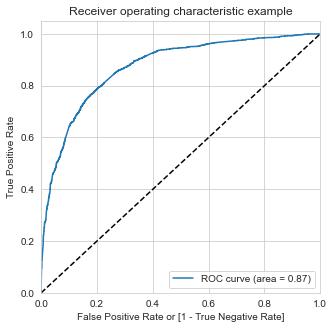

In [72]:
# Plotting ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [73]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.550239,1,1,1,1,1,1,1,0,0,0,0
1,1,0.996605,1,1,1,1,1,1,1,1,1,1,1
2,1,0.964351,1,1,1,1,1,1,1,1,1,1,1
3,1,0.686995,1,1,1,1,1,1,1,1,0,0,0
4,0,0.249656,0,1,1,1,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.484626,1.000000,0.000000
0.1,0.1,0.581918,0.984848,0.203028
0.2,0.2,0.719826,0.945076,0.508014
0.3,0.3,0.773749,0.897727,0.657168
0.4,0.4,0.790730,0.850379,0.734639
0.5,0.5,0.794401,0.752367,0.833927
0.6,0.6,0.783616,0.689394,0.872217
0.7,0.7,0.750344,0.570549,0.919412
0.8,0.8,0.721202,0.479640,0.948353
0.9,0.9,0.662689,0.325284,0.979964


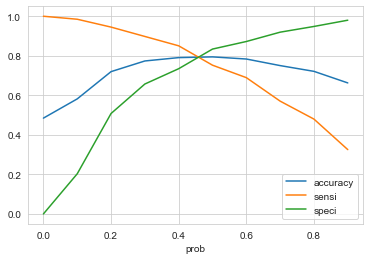

In [75]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
# Get prediction based on cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.43 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.550239,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996605,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.964351,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.686995,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.249656,0,1,1,1,0,0,0,0,0,0,0,0


In [77]:
# Check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7930243230839835

In [78]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1776,  470],
       [ 432, 1680]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# See the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7954545454545454

In [81]:
# Calculate specificity
TN / float(TN+FP)

0.7907390917186109

### Calulating Precision & Recall

In [82]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8098878695208971

In [83]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7523674242424242

In [84]:
# Precision & Recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

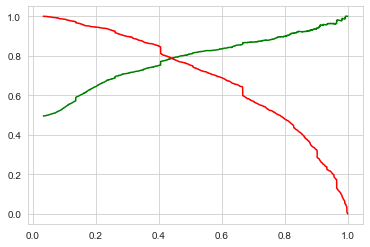

In [85]:
# Plotting Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on the Test Set

In [86]:
# Scale the test set as well using just 'transform'
features = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[features] = scaler.fit_transform(X_test[features])

In [87]:
# Select feature used in model
X_test = X_test[selected_features]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable
5067,0.294118,0.075899,0,0,0,0,0,0,0,0,1,0,0,0
5655,0.058824,0.220151,0,1,0,0,0,0,0,1,0,1,0,0
8114,0.294118,0.620950,0,1,0,0,0,0,0,0,1,1,0,0
1931,0.000000,0.000000,0,0,1,0,0,0,1,0,1,1,0,0
3325,0.000000,0.000000,1,0,0,0,0,0,1,0,1,0,0,0


In [88]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [89]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [90]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5067,0.206905
5655,0.093498
8114,0.517916
1931,0.508179
3325,0.964351


In [91]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [92]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [93]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.206905
1,1,0.093498
2,0,0.517916
3,1,0.508179
4,1,0.964351


In [94]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.206905
1,1,0.093498
2,0,0.517916
3,1,0.508179
4,1,0.964351


In [95]:
# Make predictions on the test set using 0.43 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.206905,0
1,1,0.093498,0
2,0,0.517916,1
3,1,0.508179,1
4,1,0.964351,1


In [96]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7858672376873662

In [97]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[780, 207],
       [193, 688]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Calculate sensitivity
TP / float(TP+FN)

0.7809307604994324

In [100]:
# Calculate specificity
TN / float(TN+FP)

0.790273556231003